# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Read data

In [2]:
af = 'vv'

# df__train = pd.read_csv(f'data/tr.{af}1.csv')
# df__test = pd.read_csv(f'./data/t.{af}1.csv')
df = pd.read_csv(f'./data/v.{af}1.csv', index_col=[0])

In [3]:
df.loc[df['Label'] != 5, 'LabelBin'] = 0
df.loc[df['Label'] == 5, 'LabelBin'] = 1

In [4]:
# Dividing the train data into attack and non-attack category
normal = df[df['LabelBin'] == 0]
anomaly = df[df['LabelBin'] == 1]

print(normal.shape, anomaly.shape)

(753124, 88) (11508, 88)


# Correlation

In [5]:
def multi_corr(col1, col2, df):
    """
    This function returns correlation between 2 given features.
    Also gives corr of the given features with "label" afetr applying log1p to it.
    """
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print(f'Correlation : {corr}\nlog_Correlation: {log_corr}')

In [6]:
def corr(col1, col2, df):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

## Get correlation matrix

In [8]:
""" Plotting the correlation matrix of numerical feature in dataset """
#? correlation matrix
corr_mat = df.corr(method='pearson')

# plt.figure(figsize=(6,6)) 
# sns.heatmap(corr_mat, square=True)
# plt.show()
corr_mat.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

In [9]:
""" Getting and printing high correlated features """
limit = 0.3
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= limit or corr_mat.iloc[i, j] <= -limit:
            print(f'{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}')

Sport                SportHex             0.9985015765739531
Dport                Proto_other          0.35350956324075106
Dport                DportHex             0.9999253784026378
sTos                 Dir_3                0.4246358044328553
sTos                 sTos_2               0.523039716221324
sTos                 sTos_3               0.6318998091292011
sTos                 sTos_-1              -0.5414653809313574
sTos                 sTosStr              1.0
dTos                 Dir_0                0.5375095802519865
dTos                 Dir_5                0.5395102867573315
dTos                 dTos_0               0.9864889862055571
dTos                 dTos_-1              -0.9930493679641921
dTos                 State_CON            0.536663041472988
dTos                 State_INT            -0.6942369906241718
dTos                 State_S_             -0.4986293543897272
dTos                 State_URP            -0.31219591488008513
dTos                 Proto_icmp   

Because generated features are based on original features, there will be high correlation between these

## Get correlation matrix of original features

In [10]:
""" Getting and printing high correlated features """
#? correlation matrix on original fields
corr_mat = df[['Dur','Proto','Sport','Dport','Dir','State','sTos','dTos','TotPkts','TotBytes','SrcBytes']].corr(method='pearson')
display(corr_mat.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))

limit = 0.3
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= limit or corr_mat.iloc[i, j] <= -limit:
            print(f'{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}')

,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes
Dur,1.000000,-0.226943,0.009626,0.019045,0.009231,0.001136,-0.002259,0.006228
Sport,-0.226943,1.000000,-0.008113,0.031876,0.285995,-0.017488,-0.018741,-0.005057
Dport,0.009626,-0.008113,1.000000,-0.000122,-0.010585,0.012782,0.009808,0.075802
sTos,0.019045,0.031876,-0.000122,1.000000,0.007286,-0.000204,-0.000126,0.000010
dTos,0.009231,0.285995,-0.010585,0.007286,1.000000,0.003538,0.003733,-0.002898
TotPkts,0.001136,-0.017488,0.012782,-0.000204,0.003538,1.000000,0.986756,0.272415
TotBytes,-0.002259,-0.018741,0.009808,-0.000126,0.003733,0.986756,1.000000,0.276162
SrcBytes,0.006228,-0.005057,0.075802,0.000010,-0.002898,0.272415,0.276162,1.000000


TotPkts              TotBytes             0.9867563448652203


Most correlated features are:
* TotPkts, TotBytes

## Get correlation matrix of numeric calculated features

In [11]:
""" Getting and printing high correlated features """
#? correlation matrix on original fields
corr_mat = df[['PktsPerSec','BytesPerSec','SrcBytesPerSec','BytesPerPkt']].corr(method='pearson')
display(corr_mat.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))

limit = 0.3
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= limit or corr_mat.iloc[i, j] <= -limit:
            print(f'{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}')

,PktsPerSec,BytesPerSec,SrcBytesPerSec,BytesPerPkt
PktsPerSec,1.000000,0.898077,0.585165,-0.074692
BytesPerSec,0.898077,1.000000,0.686403,0.060703
SrcBytesPerSec,0.585165,0.686403,1.000000,-0.022180
BytesPerPkt,-0.074692,0.060703,-0.022180,1.000000


PktsPerSec           BytesPerSec          0.8980766382897152
PktsPerSec           SrcBytesPerSec       0.5851648292967798
BytesPerSec          SrcBytesPerSec       0.6864026841803242


## Get correlation matrix of original with numeric calculated features

In [12]:
""" Getting and printing high correlated features """
#? correlation matrix on original fields
corr_mat = df[['PktsPerSec','BytesPerSec','SrcBytesPerSec','BytesPerPkt','TotPkts','TotBytes','SrcBytes']].corr(method='pearson')
display(corr_mat.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1))

limit = 0.3
columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= limit or corr_mat.iloc[i, j] <= -limit:
            print(f'{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}')

,PktsPerSec,BytesPerSec,SrcBytesPerSec,BytesPerPkt,TotPkts,TotBytes,SrcBytes
PktsPerSec,1.000000,0.898077,0.585165,-0.074692,0.000683,0.000793,-0.001321
BytesPerSec,0.898077,1.000000,0.686403,0.060703,0.041651,0.043172,0.004552
SrcBytesPerSec,0.585165,0.686403,1.000000,-0.022180,-0.002974,-0.002958,-0.000640
BytesPerPkt,-0.074692,0.060703,-0.022180,1.000000,0.079703,0.088747,0.028798
TotPkts,0.000683,0.041651,-0.002974,0.079703,1.000000,0.986756,0.272415
TotBytes,0.000793,0.043172,-0.002958,0.088747,0.986756,1.000000,0.276162
SrcBytes,-0.001321,0.004552,-0.000640,0.028798,0.272415,0.276162,1.000000


PktsPerSec           BytesPerSec          0.8980766382897152
PktsPerSec           SrcBytesPerSec       0.5851648292967798
BytesPerSec          SrcBytesPerSec       0.6864026841803242
TotPkts              TotBytes             0.9867563448652203


## Pairplots of highly correlated features

### TotPkts and TotBytes

<AxesSubplot:xlabel='TotPkts', ylabel='TotBytes'>

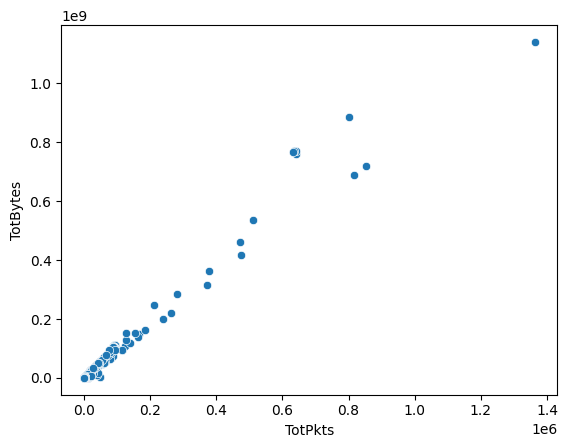

In [13]:
sns.scatterplot(x='TotPkts', y='TotBytes', data=df)

<AxesSubplot:xlabel='TotBytes', ylabel='TotPkts'>

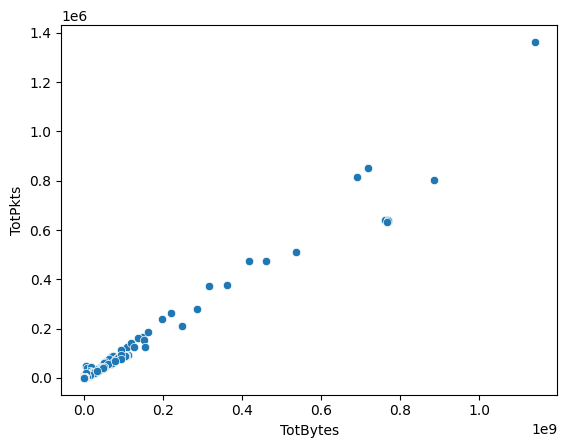

In [14]:
sns.scatterplot(x='TotBytes', y='TotPkts', data=df)

### TotBytes and SrcBytes

<AxesSubplot:xlabel='TotBytes', ylabel='SrcBytes'>

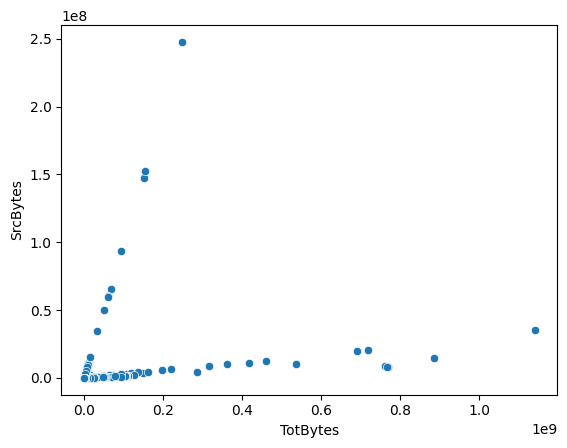

In [15]:
sns.scatterplot(x='TotBytes', y='SrcBytes', data=df)

<AxesSubplot:xlabel='SrcBytes', ylabel='TotBytes'>

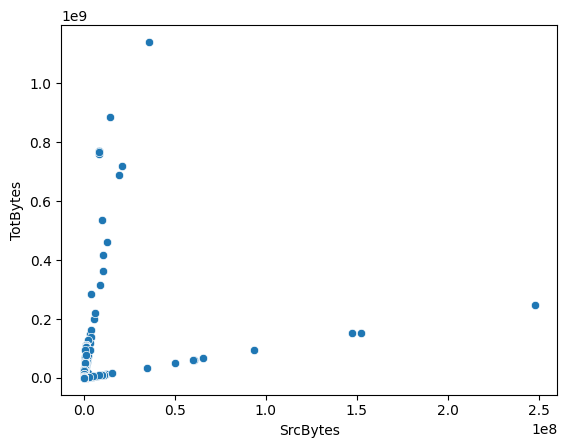

In [16]:
sns.scatterplot(x='SrcBytes', y='TotBytes', data=df)

### BytesPerSec and SrcBytesPerSec

<AxesSubplot:xlabel='BytesPerSec', ylabel='SrcBytesPerSec'>

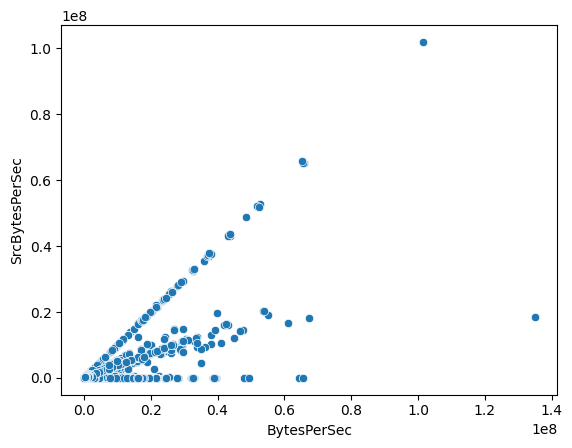

In [17]:
sns.scatterplot(x='BytesPerSec', y='SrcBytesPerSec', data=df)

<AxesSubplot:xlabel='SrcBytesPerSec', ylabel='BytesPerSec'>

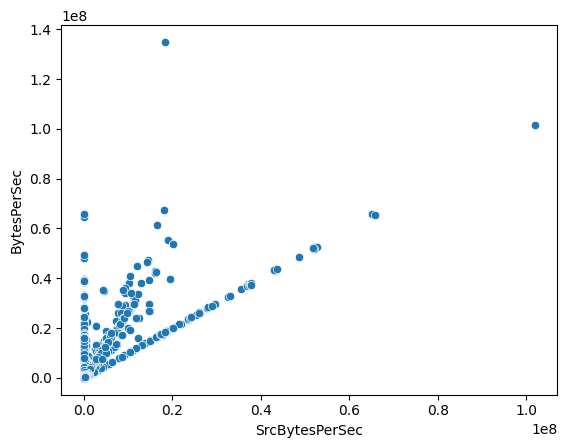

In [18]:
sns.scatterplot(x='SrcBytesPerSec', y='BytesPerSec', data=df)

# Statistical Hypothesis on Numeric features

### Step 1: Assume samples are independent, 2 populations follow normal distribution.  
- $Normal = X \sim N(µ_1, σ_1^2)$  
- $Abnormal = Y \sim N(µ_2, σ^2_2)$
### Step 2: F-test 2 variances: 
- #### 2.1. Build Hypothesis:
  - $H_0 : σ^2_1 = σ^2_2$  
  - $H_1 : σ^2_1 \neq σ^2_2$  
- #### 2.2. Calculate F-score $F_{obs}$  
  - $F_{obs} = \frac{S_1^2}{S_2^2}$ ~ $Fisher$ $ n-1, m-1$   
- #### 2.3. Calculate p-value 
  - $p_{value} = \mathbb{P}(F_{n-1, m-1} > F_{obs}) + \mathbb{P}(F_{n-1, m-1} < 1/F_{obs})$  

### Step 3: T-test 2 means.   
- #### 3.1. Build Hypothesis:
  - $H_0$ : $\mu_1 = \mu_2$  
  - $H_1$ : $\mu_1 \neq \mu_2$  
- #### 3.2. Calculate t-score $t_{obs}$  
  - If **$σ^2_1 = σ^2_2$** : $t_{obs} = \frac{\hat{X} - \hat{Y}}{\sqrt{S^2(\frac{1}{n} + \frac{1}{m})}} \sim t_{n + m - 2}$ 
with $S^2 = \frac{(n-1)S_1^2 + (m-1)S_2^2}{n + m -2}$
  - If **$σ^2_1 \neq σ^2_2$** : $t_{obs} = \frac{\hat{X} - \hat{Y}}{\sqrt{(\frac{S_1^2}{n} + \frac{S_2^2}{m})}} \sim t_{v}$ 
with $\mu = \frac{(\frac{S_1^2}{n} + \frac{S_2^2}{n})^2}{(\frac{S_1^2}{n})^2 /(n-1)  + \frac{S_2^2}{n})^2 /(m-1)}$
- #### 3.3. Calculate p-value 
  - If **$σ^2_1 = σ^2_2$** : $p_{value} = 2P(T_{n-1} > |t_{obs}|)$ 
  - If **$σ^2_1 \neq σ^2_2$** : $p_{value} = 2P(T_{v} > |t_{obs}|)$


In [55]:
#? what cols to do analysis and test hypothesis
num_cols = [
      'Dur', 
      # 'sTos','dTos',
      # 'Sport', 'Dport',
      # 'SportHex', 'DportHex', 
      'TotPkts', 'TotBytes', 'SrcBytes', 'DstBytes',
      'PktsPerSec', 'BytesPerSec', 'SrcBytesPerSec', 'BytesPerPkt', 'DstBytesPerSec',
      # 'SportHex', 'DportHex',
      # 'State_CON', 'State_alltcp', 'State_INT', 'State_S_',
      #    'State_URP', 'State_ECO', 'State_RED', 'State_REQ', 'State_ECR',
      #    'State_URH', 'State_TXD', 'State_URFIL', 'State_R_', 'State_URN',
      #    'State_RSP', 'State_URHPRO', 'State_A_', 'State_other', 
      # 'Flag_nan',
      #    'Flag_S', 'Flag_A', 'Flag_P', 'Flag_R', 'Flag_F', 'Proto_udp',
      #    'Proto_tcp', 'Proto_icmp', 'Proto_rtp', 'Proto_rtcp', 'Proto_igmp',
      #    'Proto_arp', 'Proto_other', 
      # 'Service_80', 'Service_443',
      #    'Service_21', 'Service_22', 'Service_25', 'Service_6667',
      #    'Service_other',
]
cat_cols = ['Proto', 'Dir' , 'sTos', 'dTos', 'State', 'State_orig', 'Service']

In [52]:
#? get small fraction of data
sampletrain = df.sample(frac=1)[:1000000]

print(sampletrain['LabelBin'].value_counts())

normal = sampletrain[sampletrain['LabelBin'] == 0]
abnormal = sampletrain[sampletrain['LabelBin'] == 1]

0.0    753124
1.0     11508
Name: LabelBin, dtype: int64

In [54]:
sampletrain.columns

Index(['StreamID', 'StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir',
       'DstAddr', 'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes',
       'SrcBytes', 'Label', 'LabelStr', 'PktsPerSec', 'BytesPerSec',
       'SrcBytesPerSec', 'BytesPerPkt', 'DstBytes', 'DstBytesPerSec', 'sTos_0',
       'sTos_2', 'sTos_3', 'sTos_1', 'sTos_-1', 'dTos_0', 'dTos_-1', 'dTos_3',
       'dTos_2', 'dTos_1', 'State_orig', 'State_CON', 'State_alltcp',
       'State_INT', 'State_S_', 'State_URP', 'State_ECO', 'State_RED',
       'State_REQ', 'State_ECR', 'State_URH', 'State_TXD', 'State_URFIL',
       'State_R_', 'State_URN', 'State_RSP', 'State_URHPRO', 'State_A_',
       'State_other', 'Flag_nan', 'Flag_S', 'Flag_A', 'Flag_P', 'Flag_R',
       'Flag_F', 'Proto_udp', 'Proto_tcp', 'Proto_icmp', 'Proto_rtp',
       'Proto_rtcp', 'Proto_igmp', 'Proto_arp', 'Proto_other', 'Service',
       'Service_80', 'Service_443', 'Service_21', 'Service_22', 'Service_25',
       'Service_6667', 'Service_other'

### Example. TotPkts

#### Step 2: F-test to check the euqality of variances

In [58]:
varTotPktsNormal = normal['TotPkts'].var()
varTotPktsAbnormal = abnormal['TotPkts'].var()

Fobs = varTotPktsNormal/varTotPktsAbnormal
print('Fobs', Fobs)

df1, df2 = len(normal)-1, len(abnormal)-1
p1 = 1 - stats.f.cdf(Fobs, df1, df2)
print(p1)

Fobs 797.881162521229
1.1102230246251565e-16


$p_{value} = 1.11e^{-16} $ small enough to reject $H'_0$. Two variances are different.  

#### Step 3: t-test to check the equality of means

In [60]:
meanTotPktsNormal = normal['TotPkts'].mean()
meanTotPktsAbnormal = abnormal['TotPkts'].mean()

n, m = len(normal), len(abnormal)

#? as we reject H'0, 2 variances are different
tObs = (meanTotPktsNormal - meanTotPktsAbnormal) / np.sqrt(varTotPktsNormal / n + varTotPktsAbnormal / m)
print('tObs', tObs)

nu = round((varTotPktsNormal / n + varTotPktsAbnormal / m)**2 / ((varTotPktsNormal / n)**2 / (n - 1) + (varTotPktsAbnormal / m)**2 / (m - 1)))
p2 = 2 * (1 - stats.t.cdf(np.abs(tObs), nu))
p2

tObs 13.059673259866699


0.0

In [66]:
#? or use scipy library
tObs, p2 = stats.ttest_ind(normal['TotPkts'].values, abnormal['TotPkts'].values, equal_var=False)
tObs, p2

(13.059673259866699, 5.6644035277290015e-39)

> If $p_{value} ≤ α$, reject $H0$  
> If $p_{value} ≥ α$, not enough evidence to reject $H0$.


### Pipeline

In [79]:
def check_numeric_ft(ft_name, normal, abnormal, verbose=0):
    if verbose == 1:
        print('\n-------------------')
        print(ft_name, '\n')
        print(normal[ft_name].describe(), '\n')
        print(abnormal[ft_name].describe(), '\n')

    varFtNormal = normal[ft_name].var()
    varFtAbnormal = abnormal[ft_name].var()
    Fobs = varFtNormal/varFtAbnormal
    
    n, m = len(normal), len(abnormal)
    p1 = 1 - stats.f.cdf(Fobs, n - 1, m - 1) + stats.f.cdf(1 / Fobs, n - 1, m - 1)

    #? is p1 small enough to reject H'0
    equal_var = False if p1 < 0.05 else True
    tObs, p2 = stats.ttest_ind(normal[ft_name].values, abnormal[ft_name].values, equal_var=equal_var)

    if verbose == 1:
        print(f'p1 = {p1}')
        print(f'   => equal_var = {equal_var}')
        print(f'p2 = {p2}')

    return p1, p2

In [80]:
for ft in num_cols:
    p1, p2 = check_numeric_ft(ft, normal, abnormal, verbose=1)
    #? is p2 small enough to reject H0 ?


-------------------
Dur 

count    753124.000000
mean        565.486108
std        1120.125323
min           0.000000
25%           0.000323
50%           0.001210
75%          63.484906
max        3658.204459
Name: Dur, dtype: float64 

count    11508.000000
mean        89.688132
std        399.574872
min          0.000000
25%          8.550474
50%          8.949128
75%          9.039380
max       3591.921941
Name: Dur, dtype: float64 

p1 = 1.1102230246251565e-16
   => equal_var = False
p2 = 0.0

-------------------
TotPkts 

count    7.531240e+05
mean     5.671955e+01
std      3.208463e+03
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      1.362745e+06
Name: TotPkts, dtype: float64 

count    11508.000000
mean         6.495221
std        113.586825
min          0.000000
25%          2.000000
50%          3.000000
75%          6.000000
max       8773.000000
Name: TotPkts, dtype: float64 

p1 = 1.1102230246251565e-16
   => equal_var = Fal

### Conclusion ?
$p_1$ are small enough to reject $H'_0$  
$p_2$ are small enough to reject $H_0$.  
=> If 2 populations follow normal distribution, 2 variances are different, 2 means are different.  

# Chi2_contigency on Categorical features

Use chi2_contigency test to examine the relationship between a categorical feature with the Label (normal or abnormal), to see if they are independent or not.  

- $H_0$ : 2 variables are dependent  
- $H_1$ : 2 variables are independent

`scipy.stats.chi2_contingency` returns $p_{value}$. The smaller $p_{value}$ is, the stronger the evidence that $H_0$ should be rejected.  

If $H_0$ is rejected, the feature's values are not distributed similarly across different values of Label, which means 

This test tells if the relationship between variables is significant.  
If $p_{value}$ is high, there's a significant dependency between the variables.

In [88]:
for ft in cat_cols:
    crosstab = pd.crosstab(sampletrain[ft], sampletrain['LabelBin'])
    print('\n-------------------')
    print(ft)
    display(crosstab)
    chi2, p, dof, expected = stats.chi2_contingency((crosstab.values))
    print(f'chi2 = {chi2}')
    print(f'p = {p}')


-------------------
Proto


LabelBin,0.0,1.0
Proto,,
arp,144,0
icmp,8514,0
igmp,354,0
other,16,0
rtcp,610,0
rtp,961,0
tcp,100540,11178
udp,641985,330


chi2 = 63774.882836587494
p = 0.0

-------------------
Dir


LabelBin,0.0,1.0
Dir,,
->,129386,11178
?>,889,0
<-,874,0
<->,619095,330
<?>,2736,0
who,144,0


chi2 = 48292.304257646996
p = 0.0

-------------------
sTos


LabelBin,0.0,1.0
sTos,,
-1.0,1596,0
0.0,750723,11508
1.0,190,0
2.0,373,0
3.0,242,0


chi2 = 36.80369199214674
p = 1.9770737962149948e-07

-------------------
dTos


LabelBin,0.0,1.0
dTos,,
-1.0,40948,8153
0.0,712072,3355
1.0,5,0
2.0,50,0
3.0,49,0


chi2 = 80701.12867905742
p = 0.0

-------------------
State


LabelBin,0.0,1.0
State,,
A_,71,0
CON,618996,330
ECO,529,0
ECR,437,0
INT,24812,0
RED,700,0
REQ,219,0
RSP,43,0
R_,116,0


chi2 = 341275.23540027847
p = 0.0

-------------------
State_orig


LabelBin,0.0,1.0
State_orig,,
A_,71,0
A_A,21,0
A_FA,1,0
A_PA,7,0
A_R,20,0
...,...,...
URP,5151,0
_FSPA,526,0
_PA,2,0


chi2 = 383697.17633011955
p = 0.0

-------------------
Service


LabelBin,0.0,1.0
Service,,
21,40,0
22,4902,0
25,306,861
443,19724,431
6667,2,33
80,58925,8162
other,669225,2021


chi2 = 101287.04083624581
p = 0.0
